In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
df = pd.read_csv('EksImp_Dataset_BPS.csv')
data = df[['Nilai Ekspor (USD) (2021)', 'Berat Ekspor (Kg) (2021)', 'Nilai Ekspor (USD) (2022)', 'Berat Ekspor (Kg) (2022)', 'Nilai Ekspor (USD) (2023)', 'Berat Ekspor (Kg) (2023)','Nilai Impor (USD) (2021)', 'Berat Impor (Kg) (2021)', 'Nilai Impor (USD) (2022)', 'Berat Impor (Kg) (2022)', 'Nilai Impor (USD) (2023)', 'Berat Impor (Kg) (2023)']]
data.head()

,Nilai Ekspor (USD) (2021),Berat Ekspor (Kg) (2021),Nilai Ekspor (USD) (2022),Berat Ekspor (Kg) (2022),Nilai Ekspor (USD) (2023),Berat Ekspor (Kg) (2023),Nilai Impor (USD) (2021),Berat Impor (Kg) (2021),Nilai Impor (USD) (2022),Berat Impor (Kg) (2022),Nilai Impor (USD) (2023),Berat Impor (Kg) (2023)
0,6.393412e+07,2.522670e+07,6.186307e+07,2.575933e+07,2.718423e+07,8.097678e+06,572021619,146767208,512305296,123409799,401434134,127637381
1,2.002259e+07,2.414900e+06,1.569210e+07,2.232454e+06,2.074640e+07,2.389618e+06,965343727,276762560,1072638011,291857865,1016798492,312988066
2,3.707405e+09,7.874732e+08,4.009099e+09,7.531661e+08,3.619993e+09,7.270407e+08,333392815,129149962,425562732,189912150,479567997,218261127
3,5.814208e+08,3.863708e+07,6.622764e+08,4.181262e+07,6.947754e+08,3.735291e+07,1394289968,496672929,1808501699,456792091,1474328022,470674762
4,3.121807e+07,1.175662e+07,3.752292e+07,1.397662e+07,4.241230e+07,2.638960e+07,141119915,60103032,118969048,52748535,106162318,61183865


In [3]:
scaler = StandardScaler()
data_skalered = scaler.fit_transform(data)
data_df = pd.DataFrame(data_skalered, columns=['Nilai Ekspor (USD) (2021)', 'Berat Ekspor (Kg) (2021)', 'Nilai Ekspor (USD) (2022)', 'Berat Ekspor (Kg) (2022)', 'Nilai Ekspor (USD) (2023)', 'Berat Ekspor (Kg) (2023)','Nilai Impor (USD) (2021)', 'Berat Impor (Kg) (2021)', 'Nilai Impor (USD) (2022)', 'Berat Impor (Kg) (2022)', 'Nilai Impor (USD) (2023)', 'Berat Impor (Kg) (2023)',])
data_df.head()


,Nilai Ekspor (USD) (2021),Berat Ekspor (Kg) (2021),Nilai Ekspor (USD) (2022),Berat Ekspor (Kg) (2022),Nilai Ekspor (USD) (2023),Berat Ekspor (Kg) (2023),Nilai Impor (USD) (2021),Berat Impor (Kg) (2021),Nilai Impor (USD) (2022),Berat Impor (Kg) (2022),Nilai Impor (USD) (2023),Berat Impor (Kg) (2023)
0,-0.381870,-0.135631,-0.347489,-0.133128,-0.358600,-0.129311,-0.307118,-0.263403,-0.296057,-0.257140,-0.318006,-0.254951
1,-0.389069,-0.136120,-0.352891,-0.133603,-0.359483,-0.129414,-0.222640,-0.242864,-0.201762,-0.231231,-0.212950,-0.229982
2,0.215410,-0.119285,0.114323,-0.118420,0.134352,-0.116317,-0.358371,-0.266187,-0.310654,-0.246911,-0.304667,-0.242743
3,-0.297038,-0.135343,-0.277243,-0.132803,-0.267003,-0.128782,-0.130511,-0.208118,-0.077928,-0.205863,-0.134839,-0.208740
4,-0.387233,-0.135920,-0.350337,-0.133366,-0.356511,-0.128980,-0.399668,-0.277096,-0.362249,-0.268008,-0.368415,-0.263904


In [4]:
distance_metric = lambda x, y: np.linalg.norm(x - y)

In [5]:
kmedoids = KMedoids(n_clusters=3, max_iter=100, metric='euclidean', random_state=42)
medoidpred = kmedoids.fit_predict(data_skalered)

In [6]:
print(kmedoids.labels_)

[0 0 1 2 0 0 0 2 0 2 0 2 0 0 1 0 2 0 0 0 2 0 2 0 2 1 1 2 2 2 2 2 2 0 0 0 0
 1 2 1 0 0 0 1 0 0 1 1 0 0 0 2 0 2 2 0 0 0 0 2 1 1 0 1 0 0 0 0 0 0 1 1 2 1
 1 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 0 0 2 0 0 0 0 1]


CLuster Evaluation Using DBI on K-Medoids

In [7]:
dbi = davies_bouldin_score(data, kmedoids.labels_)
print('Davies-Bouldin Index:', dbi)

Davies-Bouldin Index: 1.7868366567285963


In [8]:
print("Hasil klastering:")
for i in range(len(medoidpred)):
    print(f"Data ke-{i+1}: {medoidpred[i]}")


Hasil klastering:
Data ke-1: 0
Data ke-2: 0
Data ke-3: 1
Data ke-4: 2
Data ke-5: 0
Data ke-6: 0
Data ke-7: 0
Data ke-8: 2
Data ke-9: 0
Data ke-10: 2
Data ke-11: 0
Data ke-12: 2
Data ke-13: 0
Data ke-14: 0
Data ke-15: 1
Data ke-16: 0
Data ke-17: 2
Data ke-18: 0
Data ke-19: 0
Data ke-20: 0
Data ke-21: 2
Data ke-22: 0
Data ke-23: 2
Data ke-24: 0
Data ke-25: 2
Data ke-26: 1
Data ke-27: 1
Data ke-28: 2
Data ke-29: 2
Data ke-30: 2
Data ke-31: 2
Data ke-32: 2
Data ke-33: 2
Data ke-34: 0
Data ke-35: 0
Data ke-36: 0
Data ke-37: 0
Data ke-38: 1
Data ke-39: 2
Data ke-40: 1
Data ke-41: 0
Data ke-42: 0
Data ke-43: 0
Data ke-44: 1
Data ke-45: 0
Data ke-46: 0
Data ke-47: 1
Data ke-48: 1
Data ke-49: 0
Data ke-50: 0
Data ke-51: 0
Data ke-52: 2
Data ke-53: 0
Data ke-54: 2
Data ke-55: 2
Data ke-56: 0
Data ke-57: 0
Data ke-58: 0
Data ke-59: 0
Data ke-60: 2
Data ke-61: 1
Data ke-62: 1
Data ke-63: 0
Data ke-64: 1
Data ke-65: 0
Data ke-66: 0
Data ke-67: 0
Data ke-68: 0
Data ke-69: 0
Data ke-70: 0
Data ke-71:

In [9]:
df['Cluster'] = medoidpred
df

,Kode HS dan Deskripsi,Nilai Ekspor (USD) (2021),Berat Ekspor (Kg) (2021),Nilai Ekspor (USD) (2022),Berat Ekspor (Kg) (2022),Nilai Ekspor (USD) (2023),Berat Ekspor (Kg) (2023),Nilai Impor (USD) (2021),Berat Impor (Kg) (2021),Nilai Impor (USD) (2022),Berat Impor (Kg) (2022),Nilai Impor (USD) (2023),Berat Impor (Kg) (2023),Cluster
0,[01] Binatang hidup,6.393412e+07,2.522670e+07,6.186307e+07,2.575933e+07,2.718423e+07,8.097678e+06,572021619,146767208,512305296,123409799,401434134,127637381,0
1,[02] Daging hewan,2.002259e+07,2.414900e+06,1.569210e+07,2.232454e+06,2.074640e+07,2.389618e+06,965343727,276762560,1072638011,291857865,1016798492,312988066,0
2,"[03] Ikan, krustasea, dan moluska",3.707405e+09,7.874732e+08,4.009099e+09,7.531661e+08,3.619993e+09,7.270407e+08,333392815,129149962,425562732,189912150,479567997,218261127,1
3,"[04] Susu, mentega, dan telur",5.814208e+08,3.863708e+07,6.622764e+08,4.181262e+07,6.947754e+08,3.735291e+07,1394289968,496672929,1808501699,456792091,1474328022,470674762,2
4,[05] Produk hewani,3.121807e+07,1.175662e+07,3.752292e+07,1.397662e+07,4.241230e+07,2.638960e+07,141119915,60103032,118969048,52748535,106162318,61183865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"[95] Mainan, permainan dan keperluan olahraga",6.233878e+08,5.810958e+07,4.061271e+08,1.353135e+08,6.773938e+08,5.643202e+07,398707928,98323559,431187961,95143265,453927323,107634232,0
94,[96] Berbagai barang buatan pabrik,3.884911e+08,1.287339e+08,6.002520e+06,6.151708e+05,3.372212e+08,1.302102e+08,596319816,115444409,700158664,135310732,716338890,168543730,0
95,"[97] Karya seni, barang kolektor, dan barang a...",6.709235e+06,8.452823e+05,3.943617e+05,2.896526e+05,4.936824e+06,5.662711e+05,1516651,232322,707796,92075,18607966,668698,0
96,[98] Kendaraan bermotor dan komponennya (terbo...,1.424388e+07,8.150557e+05,2.151133e+07,8.962757e+05,7.875020e+05,1.891475e+05,426450624,41987200,965915246,77301209,1016112720,83103952,0


In [10]:
df.to_csv('Hasil Clustering K-Medoids.csv', index=False)

In [11]:
data_hasil = pd.read_csv('Hasil Clustering K-Medoids.csv')

In [12]:
print(data_hasil)

                                Kode HS dan Deskripsi  \
0                                 [01] Binatang hidup   
1                                   [02] Daging hewan   
2                   [03] Ikan, krustasea, dan moluska   
3                       [04] Susu, mentega, dan telur   
4                                  [05] Produk hewani   
..                                                ...   
93      [95] Mainan, permainan dan keperluan olahraga   
94                 [96] Berbagai barang buatan pabrik   
95  [97] Karya seni, barang kolektor, dan barang a...   
96  [98] Kendaraan bermotor dan komponennya (terbo...   
97  [99] Piranti lunak, barang digital dan barang ...   

    Nilai Ekspor (USD) (2021)  Berat Ekspor (Kg) (2021)  \
0                6.393412e+07              2.522670e+07   
1                2.002259e+07              2.414900e+06   
2                3.707405e+09              7.874732e+08   
3                5.814208e+08              3.863708e+07   
4                3.1

In [13]:
# Hitung jumlah item pada setiap cluster
cluster_counts = df['Cluster'].value_counts()

# Cetak hasil
print("Cluster 0:", cluster_counts[0])
print("Cluster 1:", cluster_counts[1])
print("Cluster 2:", cluster_counts[2])
print("Total:", cluster_counts.sum())

Cluster 0: 55
Cluster 1: 19
Cluster 2: 24
Total: 98


In [14]:
data_hasil

,Kode HS dan Deskripsi,Nilai Ekspor (USD) (2021),Berat Ekspor (Kg) (2021),Nilai Ekspor (USD) (2022),Berat Ekspor (Kg) (2022),Nilai Ekspor (USD) (2023),Berat Ekspor (Kg) (2023),Nilai Impor (USD) (2021),Berat Impor (Kg) (2021),Nilai Impor (USD) (2022),Berat Impor (Kg) (2022),Nilai Impor (USD) (2023),Berat Impor (Kg) (2023),Cluster
0,[01] Binatang hidup,6.393412e+07,2.522670e+07,6.186307e+07,2.575933e+07,2.718423e+07,8.097678e+06,572021619,146767208,512305296,123409799,401434134,127637381,0
1,[02] Daging hewan,2.002259e+07,2.414900e+06,1.569210e+07,2.232454e+06,2.074640e+07,2.389618e+06,965343727,276762560,1072638011,291857865,1016798492,312988066,0
2,"[03] Ikan, krustasea, dan moluska",3.707405e+09,7.874732e+08,4.009099e+09,7.531661e+08,3.619993e+09,7.270407e+08,333392815,129149962,425562732,189912150,479567997,218261127,1
3,"[04] Susu, mentega, dan telur",5.814208e+08,3.863708e+07,6.622764e+08,4.181262e+07,6.947754e+08,3.735291e+07,1394289968,496672929,1808501699,456792091,1474328022,470674762,2
4,[05] Produk hewani,3.121807e+07,1.175662e+07,3.752292e+07,1.397662e+07,4.241230e+07,2.638960e+07,141119915,60103032,118969048,52748535,106162318,61183865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"[95] Mainan, permainan dan keperluan olahraga",6.233878e+08,5.810958e+07,4.061271e+08,1.353135e+08,6.773938e+08,5.643202e+07,398707928,98323559,431187961,95143265,453927323,107634232,0
94,[96] Berbagai barang buatan pabrik,3.884911e+08,1.287339e+08,6.002520e+06,6.151708e+05,3.372212e+08,1.302102e+08,596319816,115444409,700158664,135310732,716338890,168543730,0
95,"[97] Karya seni, barang kolektor, dan barang a...",6.709235e+06,8.452823e+05,3.943617e+05,2.896526e+05,4.936824e+06,5.662711e+05,1516651,232322,707796,92075,18607966,668698,0
96,[98] Kendaraan bermotor dan komponennya (terbo...,1.424388e+07,8.150557e+05,2.151133e+07,8.962757e+05,7.875020e+05,1.891475e+05,426450624,41987200,965915246,77301209,1016112720,83103952,0


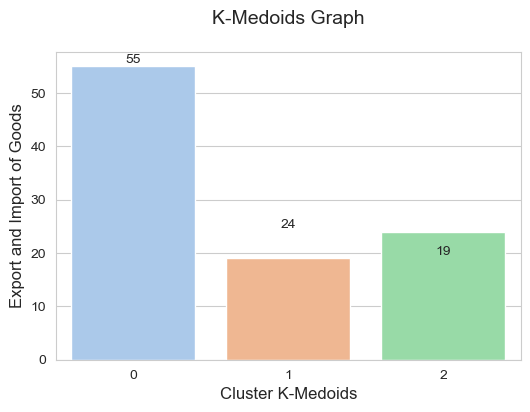

In [15]:
import seaborn as sns

grafik_count = data_hasil['Cluster'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=grafik_count.index, y=grafik_count.values, palette='pastel')
plt.title('K-Medoids Graph', fontsize=14, pad=20)
plt.xlabel('Cluster K-Medoids', fontsize=12)
plt.ylabel('Export and Import of Goods', fontsize=12)

for i, count in enumerate(grafik_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()